In [4]:
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# QALD9Plus-MT_de-babelscape_ner-mgenre_el-nllb_mt

In [5]:
df_kgqa = pd.read_csv("../data/Lingua Franca KGQA Experiments - mainTable.tsv", sep="\t")
df_neamt = pd.read_csv("../data/Lingua Franca NEAMT Evaluation (numerical placeholders) - MT Evaluation Results (All).tsv", sep="\t")
df_bert = pd.read_csv("../data/NEAMT - Compiled Metrics - Numeric Placeholder - BERTScore.tsv", sep="\t")

In [8]:
df_bert.head()

,Test Name,Language,Components,Gold File,Prediction File,Uploaded Gold File,Uploaded Prediction File,Experiment URI,BertScore F1,BLEURT Score,BLEU,BLEU NLTK,METEOR,chrF++,TER,Error Count,Timestamp,GERBIL version
0,QALD10-MT,de,"['babelscape_ner', 'mag_el', 'libre_mt']",QALD10-MT_de-en_gold_file,pred_results/QALD10-MT_de-babelscape_ner-mag_e...,94bdc8517d784fe39970f82f46d4b1e1QALD10-MT_de-e...,4739479e2b95419f8ed05f2741b026d6QALD10-MT_de-b...,https://beng.dice-research.org/gerbil/experime...,0.922489,-0.253812,25.20,0.25,0.35,0.56,0.56,0,2022-10-13 23:21:07,1.2.7
1,QALD10-MT,de,"['babelscape_ner', 'mag_el', 'opus_mt']",QALD10-MT_de-en_gold_file,pred_results/QALD10-MT_de-babelscape_ner-mag_e...,94bdc8517d784fe39970f82f46d4b1e1QALD10-MT_de-e...,90d9a94053ad4dc18077370d327365c7QALD10-MT_de-b...,https://beng.dice-research.org/gerbil/experime...,0.941424,0.038596,33.63,0.33,0.39,0.63,0.47,0,2022-10-13 23:21:17,1.2.7
2,QALD10-MT,de,"['babelscape_ner', 'mag_el', 'nllb_mt']",QALD10-MT_de-en_gold_file,pred_results/QALD10-MT_de-babelscape_ner-mag_e...,94bdc8517d784fe39970f82f46d4b1e1QALD10-MT_de-e...,c10211e821914a5882f946c5a40462afQALD10-MT_de-b...,https://beng.dice-research.org/gerbil/experime...,0.940830,0.035552,32.18,0.32,0.38,0.61,0.50,0,2022-10-13 23:21:28,1.2.7
3,QALD10-MT,de,"['babelscape_ner', 'mag_el', 'mbart_mt']",QALD10-MT_de-en_gold_file,pred_results/QALD10-MT_de-babelscape_ner-mag_e...,94bdc8517d784fe39970f82f46d4b1e1QALD10-MT_de-e...,359b8e41d0a74d8f86fb8856bdb756e4QALD10-MT_de-b...,https://beng.dice-research.org/gerbil/experime...,0.940090,0.016136,33.14,0.33,0.38,0.62,0.49,0,2022-10-13 23:21:38,1.2.7
4,QALD10-MT,de,"['babelscape_ner', 'mgenre_el', 'libre_mt']",QALD10-MT_de-en_gold_file,pred_results/QALD10-MT_de-babelscape_ner-mgenr...,94bdc8517d784fe39970f82f46d4b1e1QALD10-MT_de-e...,e1417747a6b74bc5a72d6aa4524983a9QALD10-MT_de-b...,https://beng.dice-research.org/gerbil/experime...,0.927376,-0.175624,25.89,0.26,0.35,0.57,0.54,0,2022-10-13 23:21:48,1.2.7


In [11]:
join_column = []

for i, row in df_neamt.iterrows():
    pipeline = '-'.join(c for c in ast.literal_eval(row["Components"]))
    join_column.append(f"{row['Test Name']}_{row['Source Language']}-{pipeline}")

df_neamt["join_column"] = join_column

In [9]:
join_column = []

for i, row in df_bert.iterrows():
    pipeline = '-'.join(c for c in ast.literal_eval(row["Components"]))
    join_column.append(f"{row['Test Name']}_{row['Language']}-{pipeline}")

df_bert["join_column"] = join_column

In [12]:
# inner join of two dataframes
joined = pd.merge(df_neamt, df_kgqa.rename(columns={'Dataset':'join_column'}), on='join_column',  how='inner')
joined = pd.merge(joined, df_bert, on='join_column',  how='inner')

In [14]:
joined

,Test Name_x,Source Language,Components_x,Gold File_x,Prediction File_x,Uploaded Gold File_x,Uploaded Prediction File_x,Experiment URI_x,System_x,Reference,...,BertScore F1,BLEURT Score,BLEU_y,BLEU NLTK_y,METEOR_y,chrF++_y,TER_y,Error Count_y,Timestamp,GERBIL version_y
0,QALD9PlusTrain-MT,de,"['babelscape_ner', 'mag_el', 'libre_mt']",QALD9PlusTrain-MT_de-en_gold_file,pred_results/QALD9PlusTrain-MT_de-babelscape_n...,97bcd68744bb43bf9f6799dfdfa75f1bQALD9PlusTrain...,b048441e78a946eba9ea488a60134c5dQALD9PlusTrain...,https://beng.dice-research.org/gerbil/experime...,pred (uploaded),gold (uploaded),...,0.929108,-0.230360,26.20,0.26,0.34,0.57,0.55,0,2022-10-13 23:41:59,1.2.7
1,QALD9PlusTrain-MT,de,"['babelscape_ner', 'mag_el', 'libre_mt']",QALD9PlusTrain-MT_de-en_gold_file,pred_results/QALD9PlusTrain-MT_de-babelscape_n...,97bcd68744bb43bf9f6799dfdfa75f1bQALD9PlusTrain...,b048441e78a946eba9ea488a60134c5dQALD9PlusTrain...,https://beng.dice-research.org/gerbil/experime...,pred (uploaded),gold (uploaded),...,0.929108,-0.230360,26.20,0.26,0.34,0.57,0.55,0,2022-10-13 23:41:59,1.2.7
2,QALD9PlusTrain-MT,de,"['babelscape_ner', 'mag_el', 'libre_mt']",QALD9PlusTrain-MT_de-en_gold_file,pred_results/QALD9PlusTrain-MT_de-babelscape_n...,97bcd68744bb43bf9f6799dfdfa75f1bQALD9PlusTrain...,b048441e78a946eba9ea488a60134c5dQALD9PlusTrain...,https://beng.dice-research.org/gerbil/experime...,pred (uploaded),gold (uploaded),...,0.929108,-0.230360,26.20,0.26,0.34,0.57,0.55,0,2022-10-13 23:41:59,1.2.7
3,QALD9PlusTrain-MT,de,"['babelscape_ner', 'mag_el', 'libre_mt']",QALD9PlusTrain-MT_de-en_gold_file,pred_results/QALD9PlusTrain-MT_de-babelscape_n...,97bcd68744bb43bf9f6799dfdfa75f1bQALD9PlusTrain...,b048441e78a946eba9ea488a60134c5dQALD9PlusTrain...,https://beng.dice-research.org/gerbil/experime...,pred (uploaded),gold (uploaded),...,0.929108,-0.230360,26.20,0.26,0.34,0.57,0.55,0,2022-10-13 23:41:59,1.2.7
4,QALD9PlusTrain-MT,de,"['babelscape_ner', 'mag_el', 'libre_mt']",QALD9PlusTrain-MT_de-en_gold_file,pred_results/QALD9PlusTrain-MT_de-babelscape_n...,97bcd68744bb43bf9f6799dfdfa75f1bQALD9PlusTrain...,b048441e78a946eba9ea488a60134c5dQALD9PlusTrain...,https://beng.dice-research.org/gerbil/experime...,pred (uploaded),gold (uploaded),...,0.929108,-0.230360,26.20,0.26,0.34,0.57,0.55,0,2022-10-13 23:41:59,1.2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,QALD9PlusTrain-MT,fr,"['no_ner', 'no_el', 'nllb_mt']",QALD9PlusTrain-MT_fr-en_gold_file,pred_results/QALD9PlusTrain-MT_fr-no_ner-no_el...,665ccd1878e046b9a6c51eaf28114c22QALD9PlusTrain...,25762eeedfe94115a17be0ce98dcd1ddQALD9PlusTrain...,https://beng.dice-research.org/gerbil/experime...,pred (uploaded),gold (uploaded),...,0.973299,0.472813,48.76,0.49,0.46,0.72,0.33,0,2022-10-13 23:54:26,1.2.7
300,QALD9PlusTrain-MT,fr,"['no_ner', 'no_el', 'nllb_mt']",QALD9PlusTrain-MT_fr-en_gold_file,pred_results/QALD9PlusTrain-MT_fr-no_ner-no_el...,665ccd1878e046b9a6c51eaf28114c22QALD9PlusTrain...,25762eeedfe94115a17be0ce98dcd1ddQALD9PlusTrain...,https://beng.dice-research.org/gerbil/experime...,pred (uploaded),gold (uploaded),...,0.973299,0.472813,48.76,0.49,0.46,0.72,0.33,0,2022-10-13 23:54:26,1.2.7
301,QALD9PlusTrain-MT,fr,"['no_ner', 'no_el', 'mbart_mt']",QALD9PlusTrain-MT_fr-en_gold_file,pred_results/QALD9PlusTrain-MT_fr-no_ner-no_el...,665ccd1878e046b9a6c51eaf28114c22QALD9PlusTrain...,ebbe14506a8c411584407849d9d4165bQALD9PlusTrain...,https://beng.dice-research.org/gerbil/experime...,pred (uploaded),gold (uploaded),...,0.963908,0.301440,42.83,0.43,0.43,0.70,0.38,0,2022-10-13 23:54:36,1.2.7
302,QALD9PlusTrain-MT,fr,"['no_ner', 'no_el', 'mbart_mt']",QALD9PlusTrain-MT_fr-en_gold_file,pred_results/QALD9PlusTrain-MT_fr-no_ner-no_el...,665ccd1878e046b9a6c51eaf28114c22QALD9PlusTrain...,ebbe14506a8c411584407849d9d4165bQALD9PlusTrain...,https://beng.dice-research.org/gerbil/experime...,pred (uploaded),gold (uploaded),...,0.963908,0.301440,42.83,0.43,0.43,0.70,0.38,0,2022-10-13 23:54:36,1

In [16]:
joined = joined[['Test Name_x', 'Source Language', 'Components_x', 'BertScore F1', 'BLEU_y', 'chrF++_y', 'TER_y', 'System_y', 'MicroF1', 'MacroF1', 'MicroPrecision', 'MacroPrecision', 'MicroRecall', 'MacroRecall', 'QALD-F1']]
joined.dropna(inplace=True)

/tmp/ipykernel_7659/2067930572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined.dropna(inplace=True)


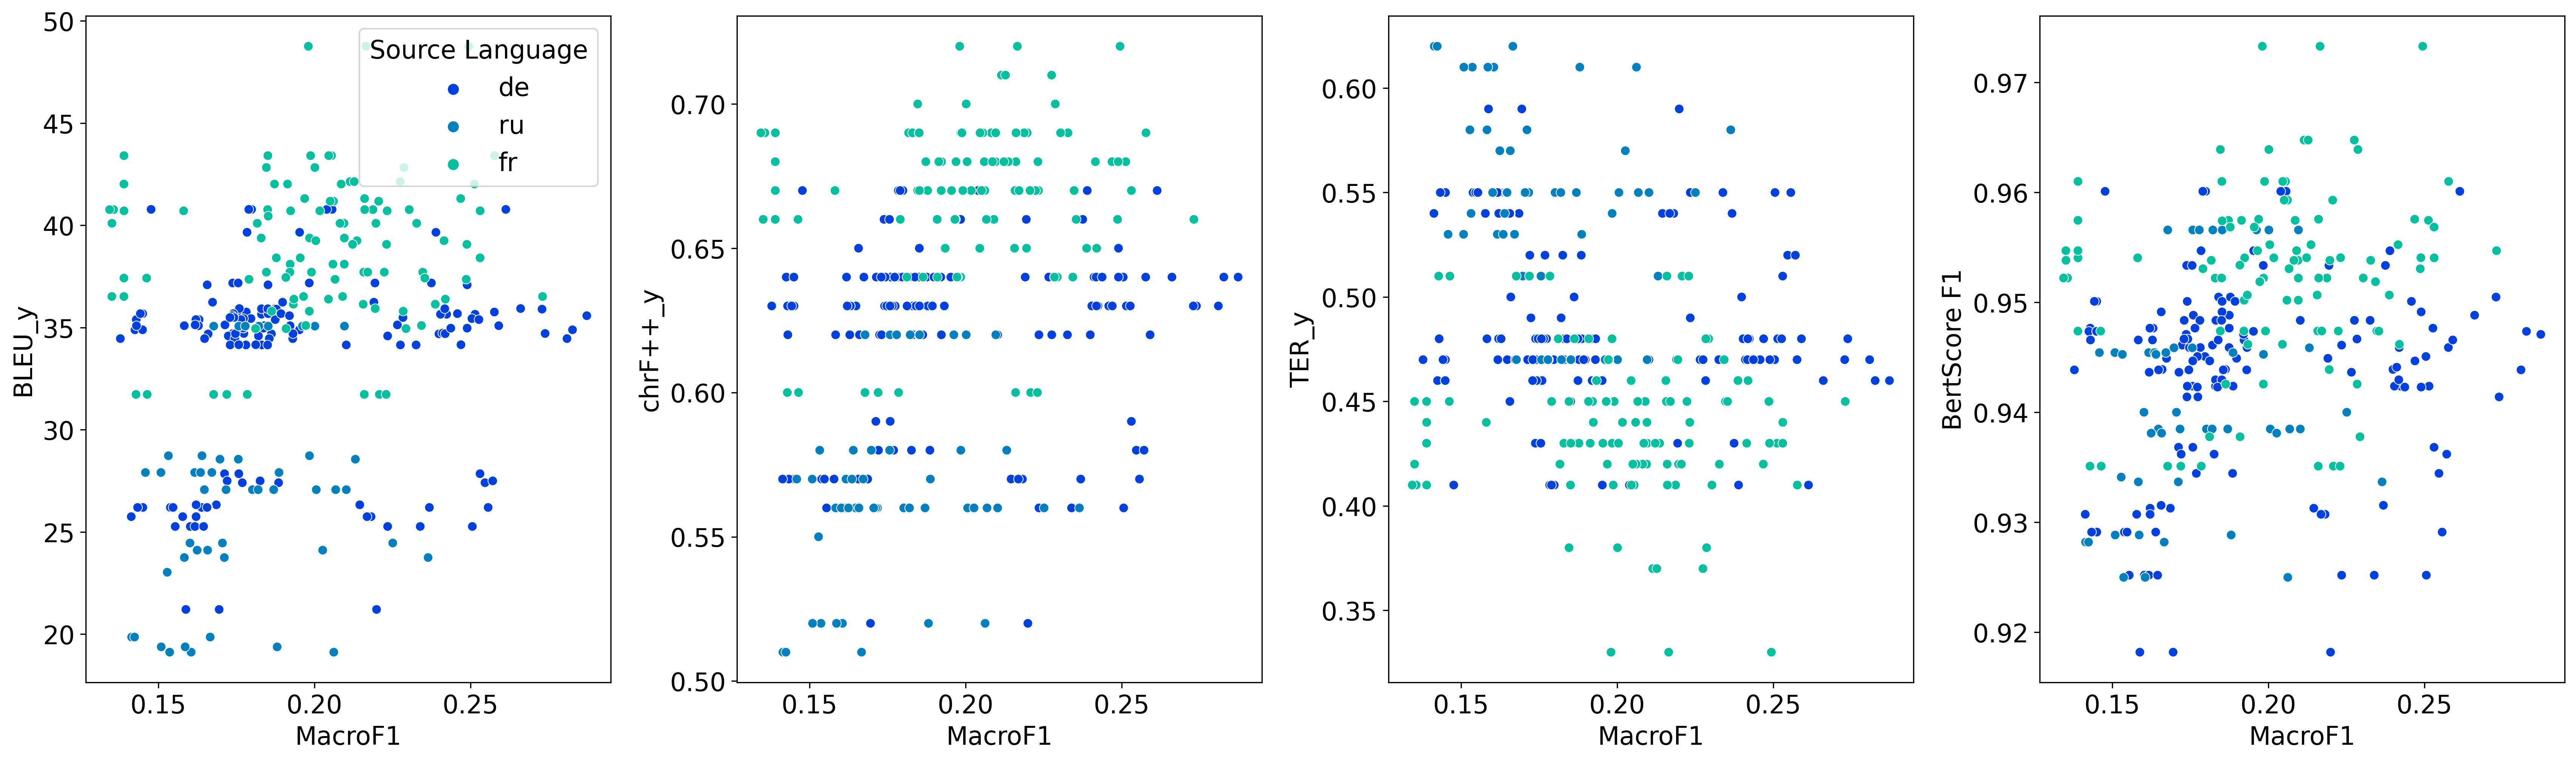

In [18]:
plt.rcParams['font.size'] = 16

metrics = ['BLEU_y', 'chrF++_y', 'TER_y', 'BertScore F1']
fig, axs = plt.subplots(ncols=len(metrics), figsize=(23, 7), dpi=300)

for i, metric in enumerate(metrics):
    sns.scatterplot(data=joined, x="MacroF1", y=metric, hue="Source Language", ax=axs[i], palette='winter')
    # axs[i].set_xticklabels(['NEAMT', 'Standard MT'])
    # axs[i].set_xlabel("")
    if i != 0:
        axs[i].legend().remove()

plt.tight_layout()
# plt.savefig('../data/img/strip-plot-all.pdf')

In [19]:
corr = joined[['BLEU_y', 'chrF++_y', 'TER_y', 'BertScore F1','MicroF1', 'MacroF1', 'MicroPrecision', 'MacroPrecision', 'MicroRecall', 'MacroRecall', 'QALD-F1']].corr()

In [20]:
corr

,BLEU_y,chrF++_y,TER_y,BertScore F1,MicroF1,MacroF1,MicroPrecision,MacroPrecision,MicroRecall,MacroRecall,QALD-F1
BLEU_y,1.000000,0.978349,-0.977061,0.894723,0.094426,0.237374,0.108298,0.225277,0.043834,0.100689,0.160485
chrF++_y,0.978349,1.000000,-0.976750,0.863755,0.095627,0.249348,0.121003,0.234298,0.036701,0.112340,0.175213
TER_y,-0.977061,-0.976750,1.000000,-0.900848,-0.104125,-0.249343,-0.114472,-0.235044,-0.050919,-0.122599,-0.186566
BertScore F1,0.894723,0.863755,-0.900848,1.000000,0.074186,0.189675,0.068401,0.182127,0.042620,0.092887,0.175217
MicroF1,0.094426,0.095627,-0.104125,0.074186,1.000000,0.821882,0.575502,0.840338,0.989049,0.778662,0.284551
MacroF1,0.237374,0.249348,-0.249343,0.189675,0.821882,1.000000,0.430983,0.997231,0.803237,0.942838,0.658397
MicroPrecision,0.108298,0.121003,-0.114472,0.068401,0.575502,0.430983,1.000000,0.440046,0.547809,0.374643,0.062933
MacroPrecision,0.225277,0.234298,-0.235044,0.182127,0.840338,0.997231,0.440046,1.000000,0.824519,0.940542,0.648840
MicroRecall,0.043834,0.036701,-0.050919,0.042620,0.989049,0.803237,0.547809,0.824519,1.000000,0.771523,0.272486
MacroRecall,0.100689,0.112340,-0.122599,0.092887,0.778662,0.942838,0.374643,0.940542,0.771523,1.000000,0.753379


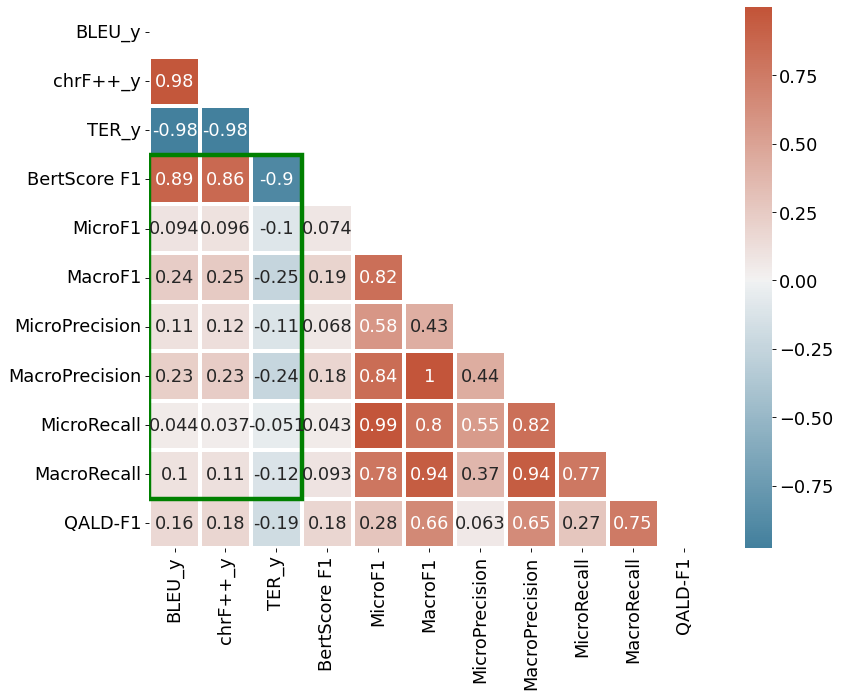

In [21]:
corr = corr.rename(columns={'BLEU_y':'BLEU', 'chrF++_y':'chrF++', 'TER_y':'TER'})
plt.rcParams['font.size'] = 16
f, ax = plt.subplots(figsize=(11, 9), dpi=80)

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, cmap=cmap, mask=mask, center=0, linewidths=3.5, fmt='.2g', ax=ax)

rect = patches.Rectangle((0, 3), 3, 7, linewidth=4, edgecolor='g', facecolor='none',)
ax.add_patch(rect)

plt.tight_layout()
plt.savefig('../data/img/mt-kgqa-heatmap.pdf')